### Complete Prophet Time Series Forecasting Code

### Forecast Daily Sales

11:13:56 - cmdstanpy - INFO - Chain [1] start processing
11:13:56 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
360 2022-12-27  227.127388  225.758639  228.571224
361 2022-12-28  228.355778  226.846728  229.838373
362 2022-12-29  229.635334  228.169636  231.023789
363 2022-12-30  230.863068  229.505094  232.321328
364 2022-12-31  231.832192  230.392327  233.304053


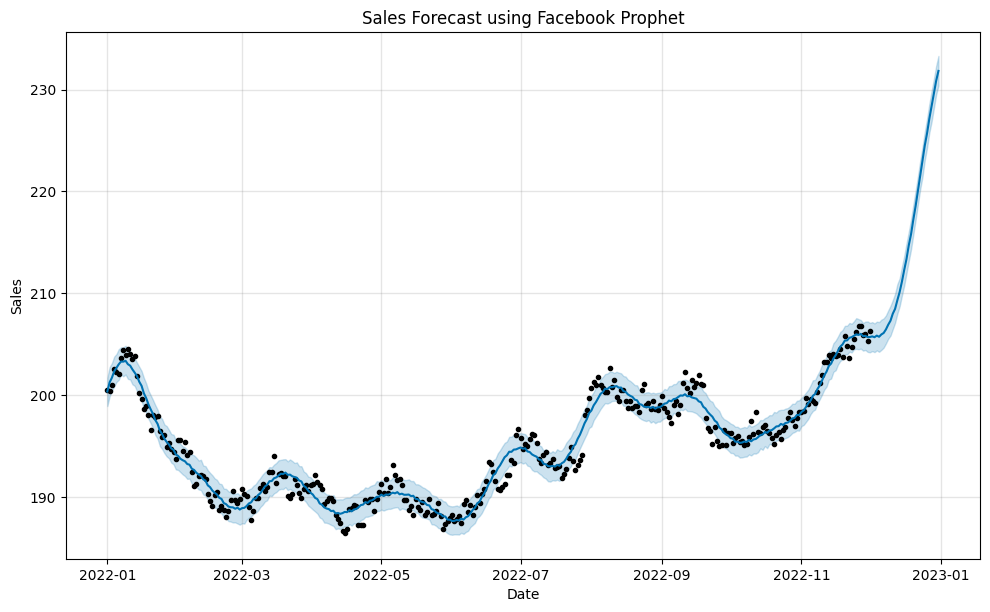

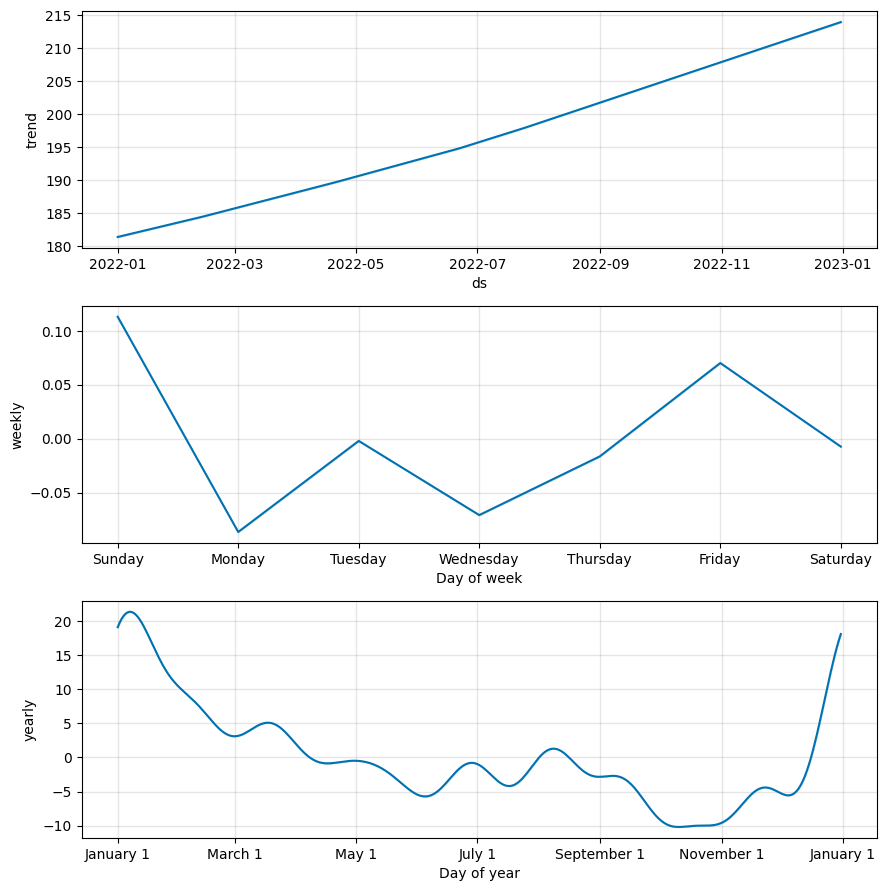

In [2]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# =========================
# 2. Create Sample Time Series Data
# =========================
np.random.seed(42)

dates = pd.date_range(start="2022-01-01", periods=365)
sales = 200 + np.random.randn(365).cumsum()

df = pd.DataFrame({
    "ds": dates,   # Prophet requires 'ds' (date)
    "y": sales     # Prophet requires 'y' (value)
})

# =========================
# 3. Train-Test Split
# =========================
train = df.iloc[:-30]
test = df.iloc[-30:]

# =========================
# 4. Initialize Prophet Model
# =========================
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# =========================
# 5. Fit Model
# =========================
model.fit(train)

# =========================
# 6. Create Future DataFrame
# =========================
future = model.make_future_dataframe(periods=30)

# =========================
# 7. Forecast
# =========================
forecast = model.predict(future)

# =========================
# 8. View Forecast Output
# =========================
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# =========================
# 9. Plot Forecast
# =========================
model.plot(forecast)
plt.title("Sales Forecast using Facebook Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# =========================
# 10. Plot Trend & Seasonality
# =========================
model.plot_components(forecast)
plt.show()


### OBSERVATIONS:

Facebook Prophet – Summary (Key Points)

1.  Prophet is a time series forecasting library developed by Facebook (Meta)

2.  Now installed as prophet (earlier fbprophet)

###  Data Requirements

DataFrame must have:

ds → Date column

y → Target value

### Core Features

1.  Handles trend, seasonality, and holidays automatically

2.  Supports daily, weekly, and yearly seasonality

3.  Robust to missing values and outliers

4.  Works well for business time series data

### Model Workflow

1.  Prepare data (ds, y)

2.  Initialize Prophet() model

3.  Fit model using model.fit()

4.  Create future dates using make_future_dataframe()

5.  Generate predictions using model.predict()

### Output Columns

yhat → Forecasted value

yhat_lower → Lower confidence interval

yhat_upper → Upper confidence interval

### Visualization

model.plot() → Forecast plot

model.plot_components() → Trend & seasonality plots

### Advantages

1.  Easy to use and fast to implement

2.  Minimal parameter tuning

3.  High interpretability

4.  Ideal for forecasting sales, demand, traffic

### Limitations

1.  Not suitable for high-frequency (seconds/minutes) data

2.  Less flexible than deep learning models for complex patterns